In [63]:
import pandas as pd
import numpy as np
import plotly.express as px

In [64]:
# importando os datasets
cidades = pd.read_excel('RELATORIO_DTB_BRASIL_MUNICIPIO.xls')
df = pd.read_csv('populacao.csv')
df.head()

,ano,sigla_uf,id_municipio,populacao
0,1991,RO,1100015,31981.0
1,1992,RO,1100015,34768.0
2,1993,RO,1100015,37036.0
3,1994,RO,1100015,39325.0
4,1995,RO,1100015,41574.0


In [65]:
cidades.head()

,uf,nome_uf,codigo_municipio,nome_municipio
0,11,Rondônia,1100015,Alta Floresta D'Oeste
1,11,Rondônia,1100379,Alto Alegre dos Parecis
2,11,Rondônia,1100403,Alto Paraíso
3,11,Rondônia,1100346,Alvorada D'Oeste
4,11,Rondônia,1100023,Ariquemes


In [66]:
# renomeando colunas
df.rename(columns={'sigla_uf': 'uf', 'id_municipio':'id'}, inplace=True)

cidades.rename(columns={'codigo_municipio':'id','nome_municipio':'cidade'}, inplace=True)

In [67]:
# unindo os 2 dataframes pelo id
df01 = pd.merge(
    left=df,
    right=cidades.filter(items=['id', 'cidade']),
    on='id'
)

In [68]:
df01

,ano,uf,id,populacao,cidade
0,1991,RO,1100015,31981.0,Alta Floresta D'Oeste
1,1992,RO,1100015,34768.0,Alta Floresta D'Oeste
2,1993,RO,1100015,37036.0,Alta Floresta D'Oeste
3,1994,RO,1100015,39325.0,Alta Floresta D'Oeste
4,1995,RO,1100015,41574.0,Alta Floresta D'Oeste
...,...,...,...,...,...
168813,2017,DF,5300108,3039444.0,Brasília
168814,2018,DF,5300108,2974703.0,Brasília
168815,2019,DF,5300108,3015268.0,Brasília
168816,2020,DF,5300108,3055149.0,Brasília


In [69]:
# reoordenando as colunas do df
df01 = df01[['ano', 'cidade', 'uf', 'id', 'populacao']]
df01

,ano,cidade,uf,id,populacao
0,1991,Alta Floresta D'Oeste,RO,1100015,31981.0
1,1992,Alta Floresta D'Oeste,RO,1100015,34768.0
2,1993,Alta Floresta D'Oeste,RO,1100015,37036.0
3,1994,Alta Floresta D'Oeste,RO,1100015,39325.0
4,1995,Alta Floresta D'Oeste,RO,1100015,41574.0
...,...,...,...,...,...
168813,2017,Brasília,DF,5300108,3039444.0
168814,2018,Brasília,DF,5300108,2974703.0
168815,2019,Brasília,DF,5300108,3015268.0
168816,2020,Brasília,DF,5300108,3055149.0


In [70]:
#df01[df01.uf == 'GO'].cidade.unique()

In [71]:
# script para criar uma coluna adicional de cidades sem acento para ordenação correta das cidades

import unicodedata

lista_sem_acento = []

for cidade in df01.cidade.values:
    original = cidade

    processado = unicodedata.normalize("NFD", original[:2])
    processado = processado.encode("ascii", "ignore")
    processado = processado.decode("utf-8")

    processado = processado + original[2:]

    if original == processado:
        lista_sem_acento.append(original)
    else:
        lista_sem_acento.append(processado)

df01.insert(
    loc = 1,
    column = 'cidade_sem_acento',
    value = lista_sem_acento
)

df01

,ano,cidade_sem_acento,cidade,uf,id,populacao
0,1991,Alta Floresta D'Oeste,Alta Floresta D'Oeste,RO,1100015,31981.0
1,1992,Alta Floresta D'Oeste,Alta Floresta D'Oeste,RO,1100015,34768.0
2,1993,Alta Floresta D'Oeste,Alta Floresta D'Oeste,RO,1100015,37036.0
3,1994,Alta Floresta D'Oeste,Alta Floresta D'Oeste,RO,1100015,39325.0
4,1995,Alta Floresta D'Oeste,Alta Floresta D'Oeste,RO,1100015,41574.0
...,...,...,...,...,...,...
168813,2017,Brasília,Brasília,DF,5300108,3039444.0
168814,2018,Brasília,Brasília,DF,5300108,2974703.0
168815,2019,Brasília,Brasília,DF,5300108,3015268.0
168816,2020,Brasília,Brasília,DF,5300108,3055149.0


In [72]:
#df01[df01.uf == 'AC'].cidade.unique()

In [73]:
# Criando o dataframe com as cidades ordenadas pelo nome da cidade 
# sem acento, por isso existe as duas colunas de índice, a primeira, 
# sem acento, para ordenar o dataframe e a segunda, com os
# nomes corretamente, com acento.

df02 = df01.pivot_table(
    values='populacao',
    index=[
        'uf',
        'cidade_sem_acento',
        'cidade',
        'id',
    ],
    columns='ano',
    fill_value=None,
)

df02

ano                                           1991     1992     1993     1994  \
uf cidade_sem_acento cidade       id                                            
AC Acrelândia        Acrelândia   1200013      NaN   5688.0   5858.0   6036.0   
   Assis Brasil      Assis Brasil 1200054   2917.0   3017.0   3182.0   3302.0   
   Brasiléia         Brasiléia    1200104  20263.0  14353.0  14737.0  15076.0   
   Bujari            Bujari       1200138      NaN   3294.0   3401.0   3501.0   
   Capixaba          Capixaba     1200179      NaN   2367.0   2418.0   2465.0   
...                                            ...      ...      ...      ...   
TO Tocantínia        Tocantínia   1721109   6179.0   5743.0   5912.0   6054.0   
   Tupirama          Tupirama     1721257      NaN      NaN      NaN      NaN   
   Tupiratins        Tupiratins   1721307      NaN   1198.0   1180.0   1162.0   
   Wanderlândia      Wanderlândia 1722081   9259.0   9427.0   9552.0   9685.0   
   Xambioá           Xambioá      1722107  11756.0  10598.0  10619.0  10636.0   

ano                                           1995     1996     1997     1998  \
uf cidade_sem_acento cidade       id                                            
AC Acrelândia        Acrelândia   1200013   6211.0   6308.0   6536.0   6730.0   
   Assis Brasil      Assis Brasil 1200054   3419.0   2918.0   2918.0   2918.0   
   Brasiléia         Brasiléia    1200104  15406.0  13955.0  13946.0  13938.0   
   Bujari            Bujari       1200138   3599.0   4101.0   4392.0   4641.0   
   Capixaba          Capixaba     1200179   2512.0   2903.0   3109.0   3286.0   
...                                            ...      ...      ...      ...   
TO Tocantínia        Tocantínia   1721109   6192.0   5169.0   4992.0   4843.0   
   Tupirama          Tupirama     1721257      NaN      NaN   1103.0   1116.0   
   Tupiratins        Tupiratins   1721307   1145.0   1313.0   1351.0   1384.0   
   Wanderlândia      Wanderlândia 1722081   9815.0  10274.0  10611.0  10894.0   
   Xambioá           Xambioá      1722107  10652.0  11183.0  11263.0  11331.0   

ano                                           1999     2000  ...     2012  \
uf cidade_sem_acento cidade       id                         ...            
AC Acrelândia        Acrelândia   1200013   6922.0   7935.0  ...  13011.0   
   Assis Brasil      Assis Brasil 1200054   2919.0   3490.0  ...   6308.0   
   Brasiléia         Brasiléia    1200104  13930.0  17013.0  ...  22261.0   
   Bujari            Bujari       1200138   4888.0   5826.0  ...   8782.0   
   Capixaba          Capixaba     1200179   3460.0   5206.0  ...   9368.0   
...                                            ...      ...  ...      ...   
TO Tocantínia        Tocantínia   1721109   4693.0   5788.0  ...   6880.0   
   Tupirama          Tupirama     1721257   1128.0   1179.0  ...   1634.0   
   Tupiratins        Tupiratins   1721307   1416.0   1365.0  ...   2208.0   
   Wanderlândia      Wanderlândia 1722081  11178.0  10273.0  ...  11088.0   
   Xambioá           Xambioá      1722107  11399.0  12137.0  ...  11458.0   

ano                                           2013     2014     2015     2016  \
uf cidade_sem_acento cidade       id                                            
AC Acrelândia        Acrelândia   1200013  13353.0  13613.0  13869.0  14120.0   
   Assis Brasil      Assis Brasil 1200054   6480.0   6610.0   6738.0   6863.0   
   Brasiléia         Brasiléia    1200104  22899.0  23378.0  23849.0  24311.0   
   Bujari            Bujari       1200138   9003.0   9173.0   9339.0   9503.0   
   Capixaba          Capixaba     1200179   9836.0  10170.0  10498.0  10820.0   
...                                            ...      ...      ...      ...   
TO Tocantínia        Tocantínia   1721109   7158.0   7236.0   7313.0   7387.0   
   Tupirama          Tupirama     1721257   1718.0   1751.0   1782.0   1813.0   
   Tupiratins        Tupiratins   1721307   2342.0   2402.0   2461.0   2518.0   

In [74]:
# Verificando se as cidades estão ordenadas corretamente
df02.loc['GO']

,,ano,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cidade_sem_acento,cidade,id,,,,,,,,,,,,,,,,,,,,,
Abadia de Goiás,Abadia de Goiás,5200050,NaN,NaN,NaN,NaN,NaN,NaN,3457.0,3553.0,3647.0,4971.0,...,7164.0,7567.0,7733.0,7895.0,8053.0,8207.0,8583.0,8773.0,8958.0,9158.0
Abadiânia,Abadiânia,5200100,9403.0,9443.0,9439.0,9455.0,9472.0,10144.0,10299.0,10431.0,10562.0,11452.0,...,16408.0,17326.0,17701.0,18069.0,18427.0,18775.0,19614.0,20042.0,20461.0,20873.0
Acreúna,Acreúna,5200134,14059.0,14521.0,14961.0,15370.0,15770.0,15330.0,15559.0,15752.0,15945.0,18301.0,...,20578.0,21366.0,21549.0,21730.0,21905.0,22076.0,22182.0,22366.0,22546.0,22710.0
Adelândia,Adelândia,5200159,2339.0,2337.0,2348.0,2352.0,2356.0,2644.0,2772.0,2882.0,2990.0,2460.0,...,2480.0,2550.0,2554.0,2557.0,2561.0,2564.0,2517.0,2516.0,2516.0,2515.0
Agua Fria de Goiás,Água Fria de Goiás,5200175,3975.0,3989.0,3996.0,4006.0,4015.0,3771.0,3679.0,3601.0,3524.0,4469.0,...,5184.0,5395.0,5451.0,5507.0,5560.0,5613.0,5676.0,5735.0,5793.0,5843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Varjão,Varjão,5221908,3424.0,3361.0,3304.0,3250.0,3197.0,3455.0,3472.0,3487.0,3502.0,3519.0,...,3681.0,3798.0,3813.0,3827.0,3842.0,3856.0,3816.0,3827.0,3838.0,3848.0
Vianópolis,Vianópolis,5222005,9068.0,9135.0,9270.0,9362.0,9452.0,9519.0,9664.0,9788.0,9911.0,11300.0,...,12737.0,13227.0,13343.0,13456.0,13567.0,13675.0,13746.0,13863.0,13977.0,14088.0
Vicentinópolis,Vicentinópolis,5222054,5149.0,5384.0,5481.0,5592.0,5700.0,5871.0,6094.0,6284.0,6472.0,6015.0,...,7576.0,7933.0,8053.0,8171.0,8286.0,8397.0,8611.0,8743.0,8873.0,9002.0


In [75]:
# Retirando a camada de índice com as cidades sem acento
df02 = df02.droplevel(1)

In [76]:
df02.loc['GO']

,ano,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
cidade,id,,,,,,,,,,,,,,,,,,,,,
Abadia de Goiás,5200050,NaN,NaN,NaN,NaN,NaN,NaN,3457.0,3553.0,3647.0,4971.0,...,7164.0,7567.0,7733.0,7895.0,8053.0,8207.0,8583.0,8773.0,8958.0,9158.0
Abadiânia,5200100,9403.0,9443.0,9439.0,9455.0,9472.0,10144.0,10299.0,10431.0,10562.0,11452.0,...,16408.0,17326.0,17701.0,18069.0,18427.0,18775.0,19614.0,20042.0,20461.0,20873.0
Acreúna,5200134,14059.0,14521.0,14961.0,15370.0,15770.0,15330.0,15559.0,15752.0,15945.0,18301.0,...,20578.0,21366.0,21549.0,21730.0,21905.0,22076.0,22182.0,22366.0,22546.0,22710.0
Adelândia,5200159,2339.0,2337.0,2348.0,2352.0,2356.0,2644.0,2772.0,2882.0,2990.0,2460.0,...,2480.0,2550.0,2554.0,2557.0,2561.0,2564.0,2517.0,2516.0,2516.0,2515.0
Água Fria de Goiás,5200175,3975.0,3989.0,3996.0,4006.0,4015.0,3771.0,3679.0,3601.0,3524.0,4469.0,...,5184.0,5395.0,5451.0,5507.0,5560.0,5613.0,5676.0,5735.0,5793.0,5843.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Varjão,5221908,3424.0,3361.0,3304.0,3250.0,3197.0,3455.0,3472.0,3487.0,3502.0,3519.0,...,3681.0,3798.0,3813.0,3827.0,3842.0,3856.0,3816.0,3827.0,3838.0,3848.0
Vianópolis,5222005,9068.0,9135.0,9270.0,9362.0,9452.0,9519.0,9664.0,9788.0,9911.0,11300.0,...,12737.0,13227.0,13343.0,13456.0,13567.0,13675.0,13746.0,13863.0,13977.0,14088.0
Vicentinópolis,5222054,5149.0,5384.0,5481.0,5592.0,5700.0,5871.0,6094.0,6284.0,6472.0,6015.0,...,7576.0,7933.0,8053.0,8171.0,8286.0,8397.0,8611.0,8743.0,8873.0,9002.0


In [77]:
# inserindo uma coluna com os nomes das cidades para avaliar valores 
# ausentes por um gráfico imshow
lista_cidades = []
for s in df02.index:
    lista_cidades.append(s[1])

    
df02.insert(
    loc = 0,
    column = 'cidade',
    value = lista_cidades
)

df02

ano                            cidade     1991     1992     1993     1994  \
uf cidade       id                                                          
AC Acrelândia   1200013    Acrelândia      NaN   5688.0   5858.0   6036.0   
   Assis Brasil 1200054  Assis Brasil   2917.0   3017.0   3182.0   3302.0   
   Brasiléia    1200104     Brasiléia  20263.0  14353.0  14737.0  15076.0   
   Bujari       1200138        Bujari      NaN   3294.0   3401.0   3501.0   
   Capixaba     1200179      Capixaba      NaN   2367.0   2418.0   2465.0   
...                               ...      ...      ...      ...      ...   
TO Tocantínia   1721109    Tocantínia   6179.0   5743.0   5912.0   6054.0   
   Tupirama     1721257      Tupirama      NaN      NaN      NaN      NaN   
   Tupiratins   1721307    Tupiratins      NaN   1198.0   1180.0   1162.0   
   Wanderlândia 1722081  Wanderlândia   9259.0   9427.0   9552.0   9685.0   
   Xambioá      1722107       Xambioá  11756.0  10598.0  10619.0  10636.0   

ano                         1995     1996     1997     1998     1999  ...  \
uf cidade       id                                                    ...   
AC Acrelândia   1200013   6211.0   6308.0   6536.0   6730.0   6922.0  ...   
   Assis Brasil 1200054   3419.0   2918.0   2918.0   2918.0   2919.0  ...   
   Brasiléia    1200104  15406.0  13955.0  13946.0  13938.0  13930.0  ...   
   Bujari       1200138   3599.0   4101.0   4392.0   4641.0   4888.0  ...   
   Capixaba     1200179   2512.0   2903.0   3109.0   3286.0   3460.0  ...   
...                          ...      ...      ...      ...      ...  ...   
TO Tocantínia   1721109   6192.0   5169.0   4992.0   4843.0   4693.0  ...   
   Tupirama     1721257      NaN      NaN   1103.0   1116.0   1128.0  ...   
   Tupiratins   1721307   1145.0   1313.0   1351.0   1384.0   1416.0  ...   
   Wanderlândia 1722081   9815.0  10274.0  10611.0  10894.0  11178.0  ...   
   Xambioá      1722107  10652.0  11183.0  11263.0  11331.0  11399.0  ...   

ano                         2012     2013     2014     2015     2016     2017  \
uf cidade       id                                                              
AC Acrelândia   1200013  13011.0  13353.0  13613.0  13869.0  14120.0  14366.0   
   Assis Brasil 1200054   6308.0   6480.0   6610.0   6738.0   6863.0   6986.0   
   Brasiléia    1200104  22261.0  22899.0  23378.0  23849.0  24311.0  24765.0   
   Bujari       1200138   8782.0   9003.0   9173.0   9339.0   9503.0   9664.0   
   Capixaba     1200179   9368.0   9836.0  10170.0  10498.0  10820.0  11136.0   
...                          ...      ...      ...      ...      ...      ...   
TO Tocantínia   1721109   6880.0   7158.0   7236.0   7313.0   7387.0   7460.0   
   Tupirama     1721257   1634.0   1718.0   1751.0   1782.0   1813.0   1843.0   
   Tupiratins   1721307   2208.0   2342.0   2402.0   2461.0   2518.0   2574.0   
   Wanderlândia 1722081  11088.0  11450.0  11509.0  11566.0  11622.0  11677.0   
   Xambioá      1722107  11458.0  11736.0  11722.0  11709.0  11695.0  11683.0   

ano                         2018     2019     2020     2021  
uf cidade       id                                           
AC Acrelândia   1200013  15020.0  15256.0  15490.0  15721.0  
   Assis Brasil 1200054   7300.0   7417.0   7534.0   7649.0  
   Brasiléia    1200104  25848.0  26278.0  26702.0  27123.0  
   Bujari       1200138  10111.0  10266.0  10420.0  10572.0  
   Capixaba     1200179  11456.0  11733.0  12008.0  12280.0  
...                          ...      ...      ...      ...  
TO Tocantínia   1721109   7471.0   7545.0   7617.0   7688.0  
   Tupirama     1721257   1860.0   1891.0   1922.0   1952.0  
   Tupiratins   1721307   2613.0   2671.0   2729.0   2785.0  
   Wanderlândia 1722081  11631.0  11683.0  11734.0  11783.0  
   Xambioá      1722107  11561.0  11540.0  11520.0  11500.0  

[5570 rows x 32 columns]

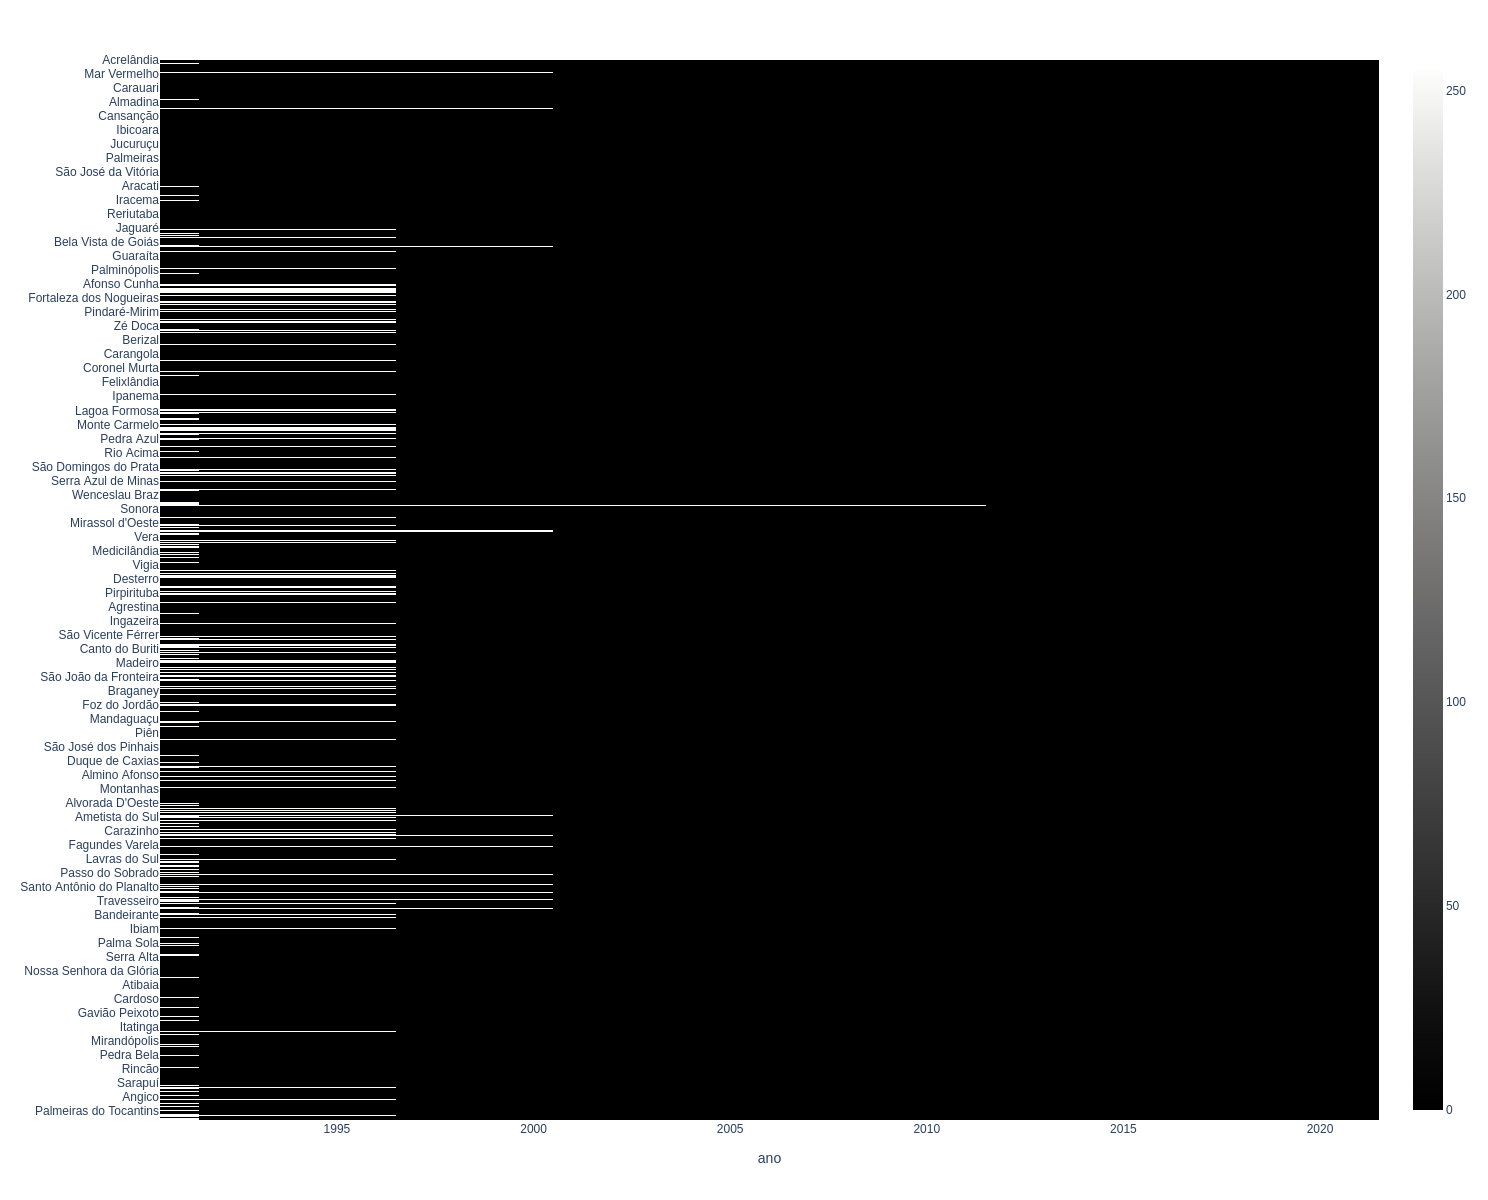

In [82]:
# avaliando valores ausentes por um gráfico imshow

fig = px.imshow(
    df02[df02.columns[1:]].isnull(),
    y=df02.cidade,
    aspect="auto",
    width=600,
    height=1200,
    color_continuous_scale='gray'
)

fig.show()